In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame after loading the CSV
data = pd.read_csv('/Users/neharana/Downloads/Pre-pregnancy-Weight-With-Deaths.csv')
print(data)

             State  Year  Deaths/100000  Underweight Unweighted Sample Size  \
0           Alaska  2016            NaN                                1144   
1         Arkansas  2016           17.0                                 864   
2         Colorado  2016           16.0                                1528   
3      Connecticut  2016            NaN                                1232   
4         Delaware  2016            NaN                                 876   
..             ...   ...            ...                                 ...   
222       Virginia  2021           60.0                                 886   
223     Washington  2021           28.0                                1119   
224  West Virginia  2021            NaN                                 599   
225      Wisconsin  2021           18.0                                 728   
226        Wyoming  2021            NaN                                 439   

     Underweight Unweighted Frequency  Underweight 

/var/folders/gb/qtmvc__x1c515933w9k_nl680000gn/T/ipykernel_64639/3281665279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underweight_data['Year'] = underweight_data['Year'].astype(str)


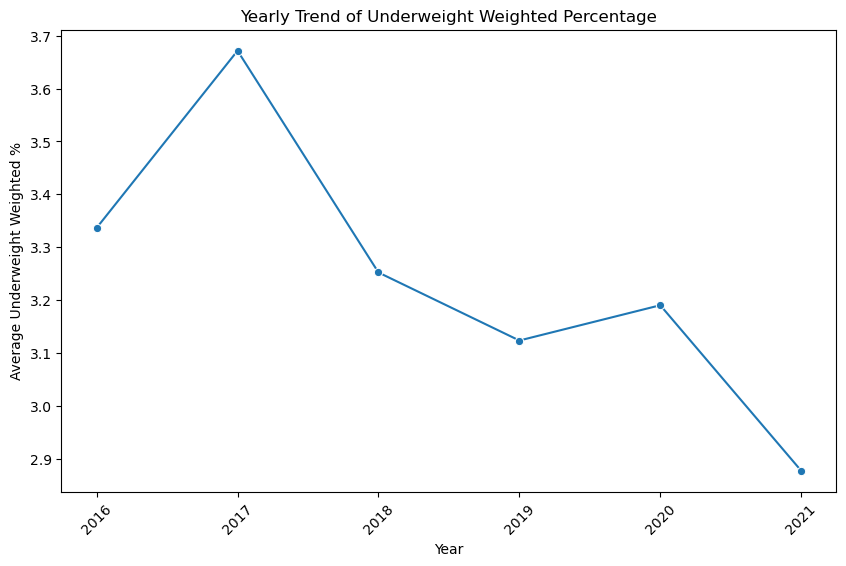

In [3]:

#UNDERWEIGHT (body mass index [BMI] <18.5 kg/m2)

columns_underweight = ['State', 'Year', 'Deaths/100000', 'Underweight Unweighted Sample Size', 'Underweight Unweighted Frequency', 'Underweight Weighted %']
underweight_data = data[columns_underweight]


underweight_data['Year'] = underweight_data['Year'].astype(str)

# Grouping by Year and calculating the average 'Underweight Weighted %' for each year
yearly_trend = underweight_data.groupby('Year')['Underweight Weighted %'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x='Year', y='Underweight Weighted %', marker='o')
plt.title('Yearly Trend of Underweight Weighted Percentage')
plt.xlabel('Year')
plt.ylabel('Average Underweight Weighted %')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()


/var/folders/gb/qtmvc__x1c515933w9k_nl680000gn/T/ipykernel_64639/2409160377.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overweight_data['Year'] = overweight_data['Year'].astype(str)


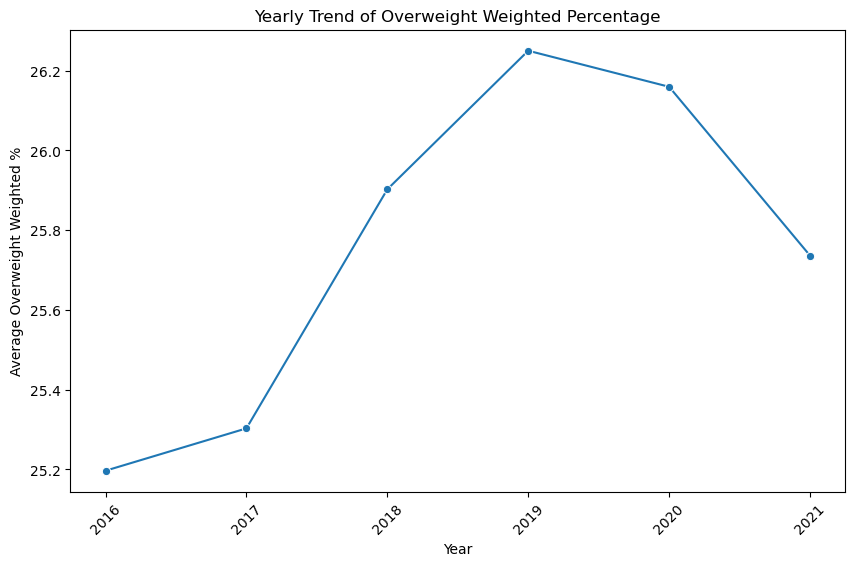

In [4]:
#OVERWEIGHT  (BMI 25–29.9 kg/m2) 
columns_overweight = ['State', 'Year', 'Deaths/100000', 'Overweight Unweighted Sample Size ', 'Overweight Unweighted Frequency  ', 'Overweight Weighted %']
overweight_data = data[columns_overweight]

overweight_data['Year'] = overweight_data['Year'].astype(str)

# Grouping by Year and calculating the average 'Underweight Weighted %' for each year
yearly_trend = overweight_data.groupby('Year')['Overweight Weighted %'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x='Year', y='Overweight Weighted %', marker='o')
plt.title('Yearly Trend of Overweight Weighted Percentage')
plt.xlabel('Year')
plt.ylabel('Average Overweight Weighted %')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

/var/folders/gb/qtmvc__x1c515933w9k_nl680000gn/T/ipykernel_64639/2791244345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obese_data['Year'] = obese_data['Year'].astype(str)


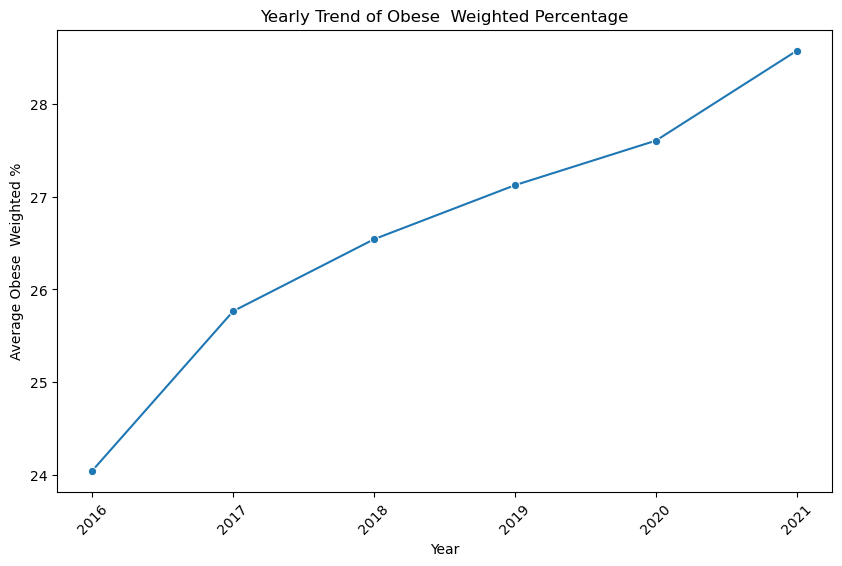

In [5]:
#OBESE (BMI ≥30 kg/m2) 
columns_Obese = ['State', 'Year', 'Deaths/100000', 'Obese Unweighted Sample Size ', 'Obese (BMI ≥30 kg/m2) -Unweighted Frequency  ', 'Obese Weighted %']
obese_data = data[columns_Obese]

obese_data['Year'] = obese_data['Year'].astype(str)

# Grouping by Year and calculating the average 'Underweight Weighted %' for each year
yearly_trend = obese_data.groupby('Year')['Obese Weighted %'].mean().reset_index()

# Plotting the trend
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x='Year', y='Obese Weighted %', marker='o')
plt.title('Yearly Trend of Obese  Weighted Percentage')
plt.xlabel('Year')
plt.ylabel('Average Obese  Weighted %')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.show()

In [68]:
# States with most underweight population in 2021

# Data preprocessing
data['Year'] = data['Year'].astype(str)  # Ensuring 'Year' is a string

# Identifying top 5 states in 2021 based on underweight percentage
states_with_valid_death_data = data.dropna(subset=['Deaths/100000'], how='all')['State'].unique()
data_filtered = data[data['State'].isin(states_with_valid_death_data)]
print(data_filtered)


             State  Year  Deaths/100000  Underweight Unweighted Sample Size  \
0           Alaska  2016            NaN                                1144   
1         Arkansas  2016           17.0                                 864   
2         Colorado  2016           16.0                                1528   
3      Connecticut  2016            NaN                                1232   
6         Illinois  2016           28.0                                1329   
..             ...   ...            ...                                 ...   
221        Vermont  2021            0.0                                 941   
222       Virginia  2021           60.0                                 886   
223     Washington  2021           28.0                                1119   
224  West Virginia  2021            NaN                                 599   
225      Wisconsin  2021           18.0                                 728   

     Underweight Unweighted Frequency  Underweight 

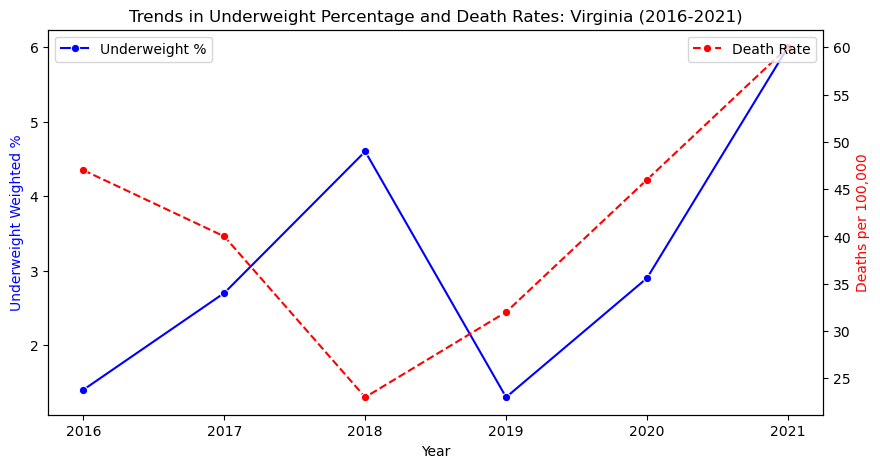

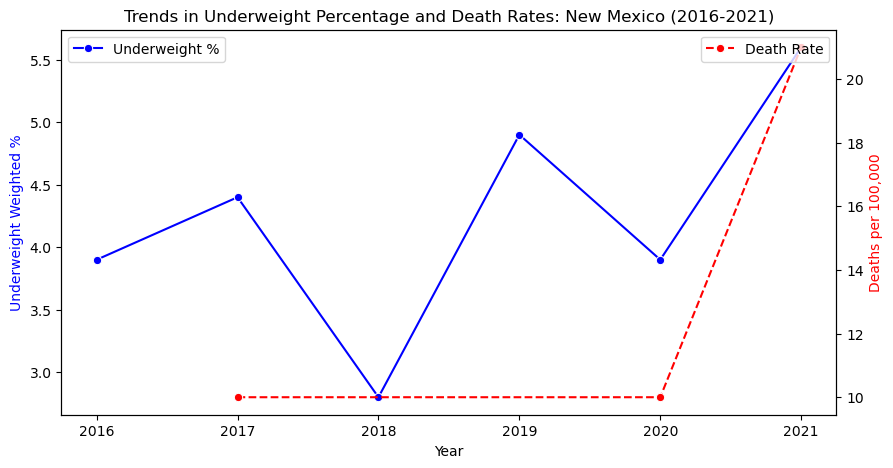

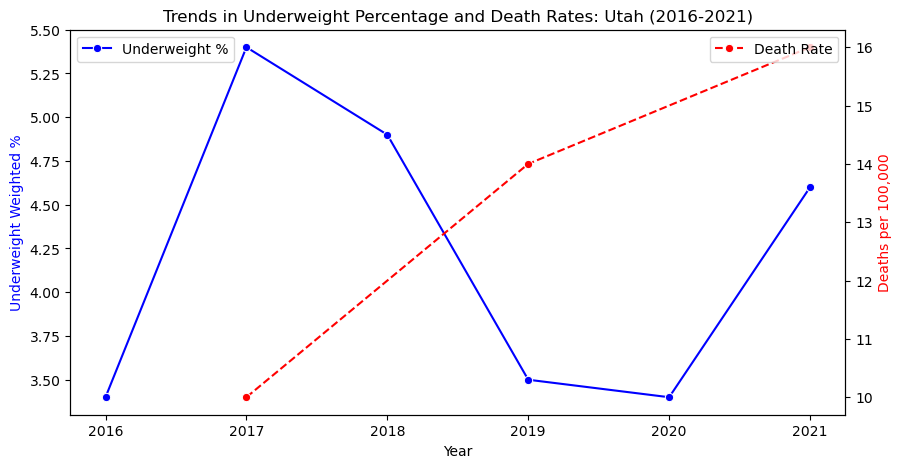

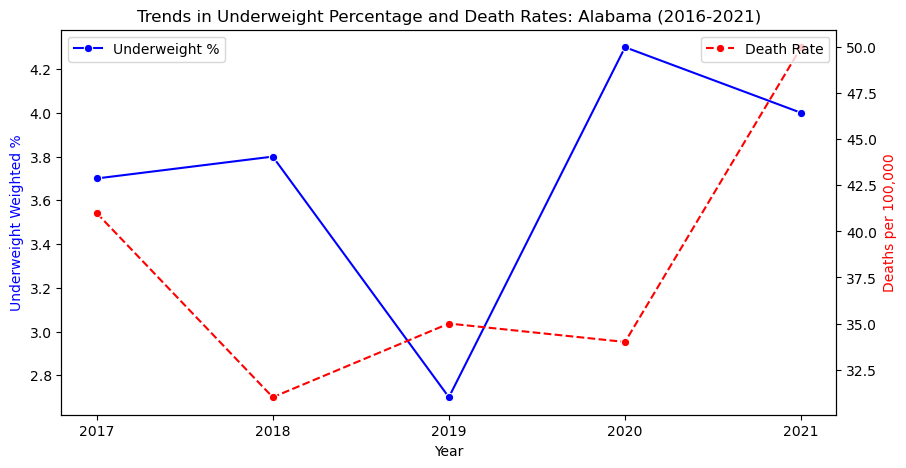

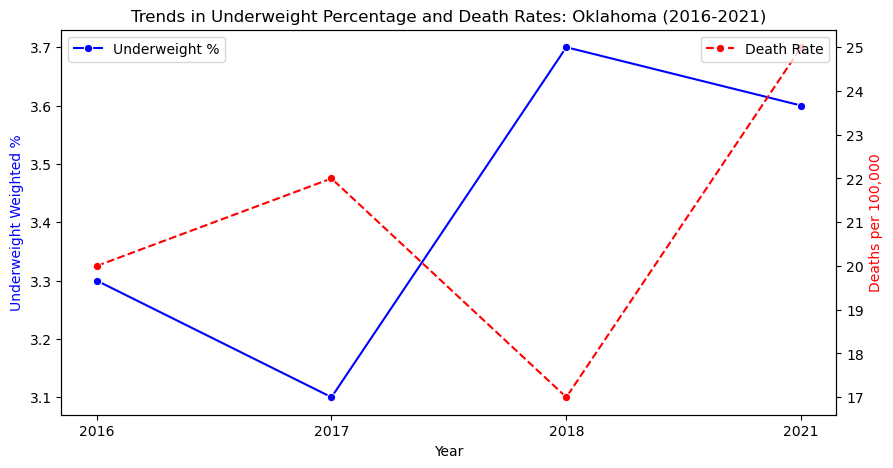

In [62]:

# Identify top 5 states in 2021 based on underweight percentage
top_states_2021_underweight= data_filtered[data_filtered['Year'] == '2021'].nlargest(5, 'Underweight Weighted %')['State']

# Creating individual plots for each of the top 5 states
for state in top_states_2021_underweight:
    state_data = data_filtered[data_filtered['State'] == state]

    plt.figure(figsize=(10, 5))
    ax1 = plt.gca()  # Primary axis for Underweight Weighted %
    ax2 = ax1.twinx()  # Secondary axis for Death Rates

    # Plotting Underweight Percentage
    sns.lineplot(x='Year', y='Underweight Weighted %', data=state_data, ax=ax1, marker='o', color='blue', label='Underweight %')

    # Plotting Death Rates
    sns.lineplot(x='Year', y='Deaths/100000', data=state_data, ax=ax2, marker='o', linestyle='--', color='red', label='Death Rate')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Underweight Weighted %', color='blue')
    ax2.set_ylabel('Deaths per 100,000', color='red')
    plt.title(f'Trends in Underweight Percentage and Death Rates: {state} (2016-2021)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

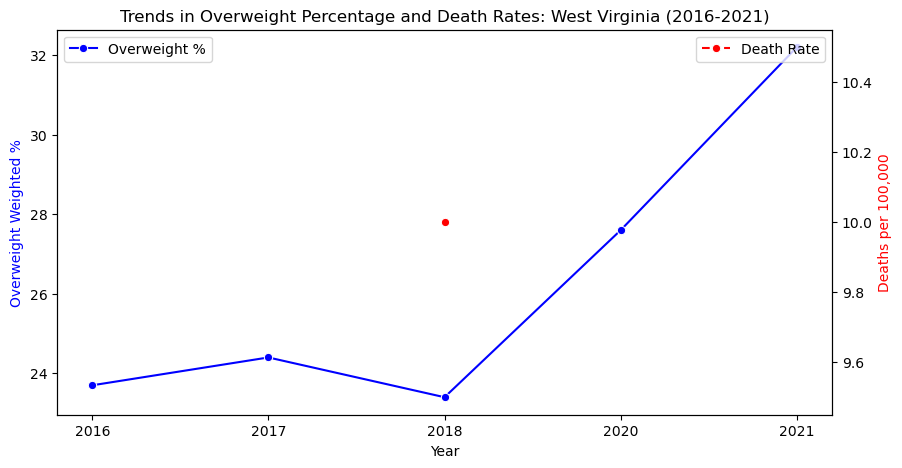

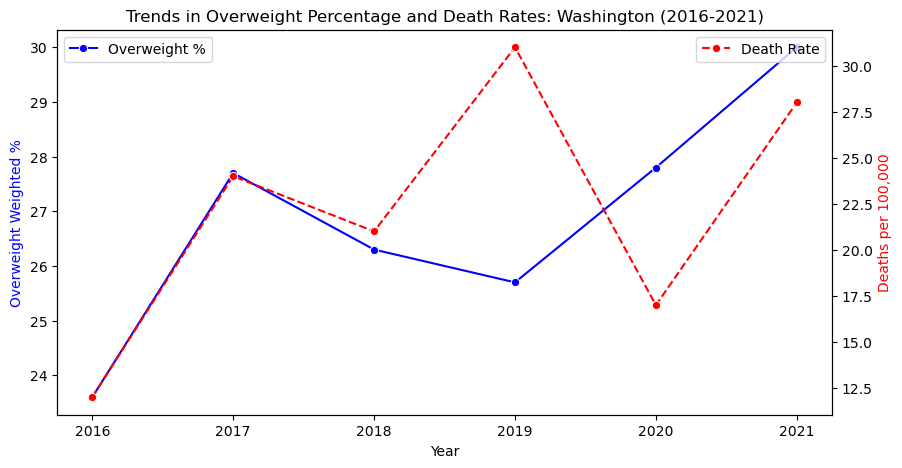

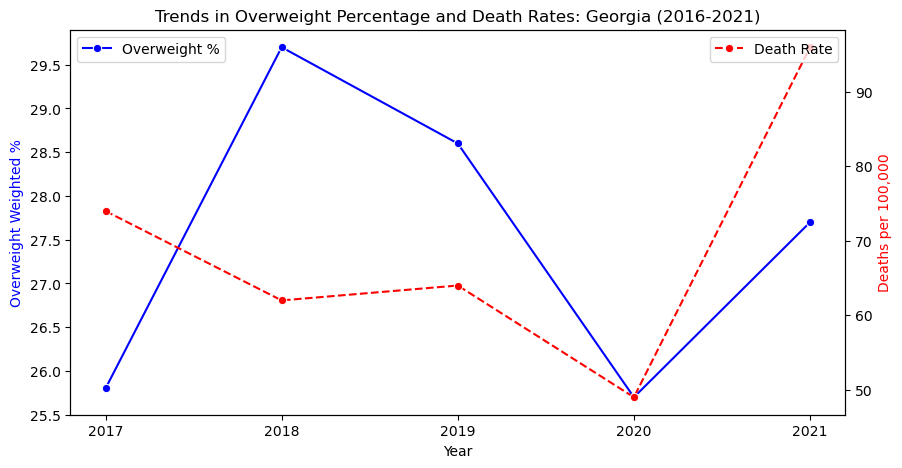

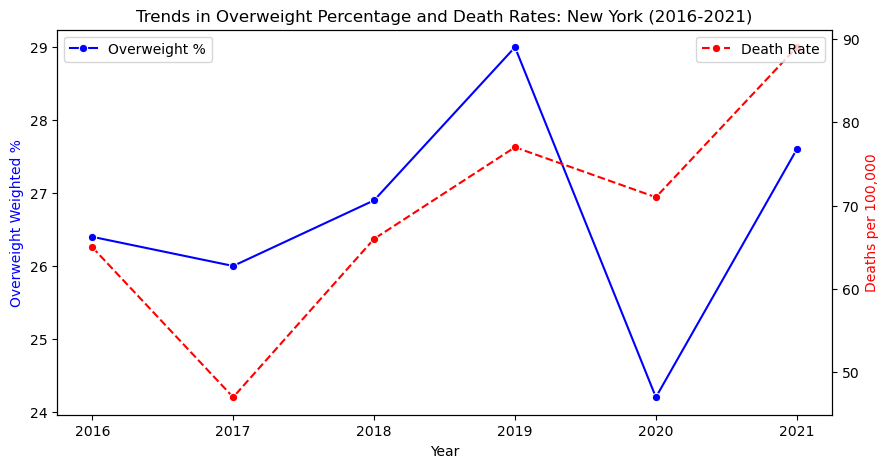

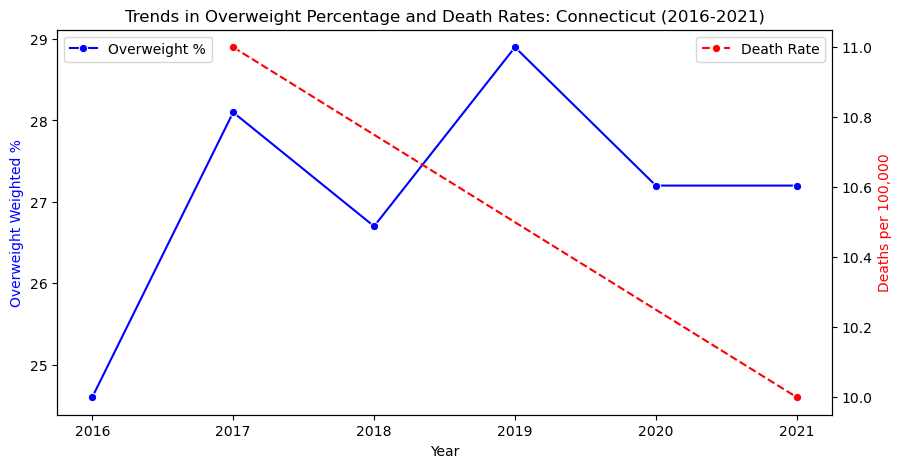

In [66]:
# Identify top 5 states in 2021 based on Overweight percentage
top_states_2021_overweight = data_filtered[data_filtered['Year'] == '2021'].nlargest(5, 'Overweight Weighted %')['State']

# Creating individual plots for each of the top 5 states
for state in top_states_2021_overweight:
    state_data = data_filtered[data_filtered['State'] == state]

    plt.figure(figsize=(10, 5))
    ax1 = plt.gca()  # Primary axis for Underweight Weighted %
    ax2 = ax1.twinx()  # Secondary axis for Death Rates

    # Plotting Underweight Percentage
    sns.lineplot(x='Year', y='Overweight Weighted %', data=state_data, ax=ax1, marker='o', color='blue', label='Overweight %')

    # Plotting Death Rates
    sns.lineplot(x='Year', y='Deaths/100000', data=state_data, ax=ax2, marker='o', linestyle='--', color='red', label='Death Rate')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Overweight Weighted %', color='blue')
    ax2.set_ylabel('Deaths per 100,000', color='red')
    plt.title(f'Trends in Overweight Percentage and Death Rates: {state} (2016-2021)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

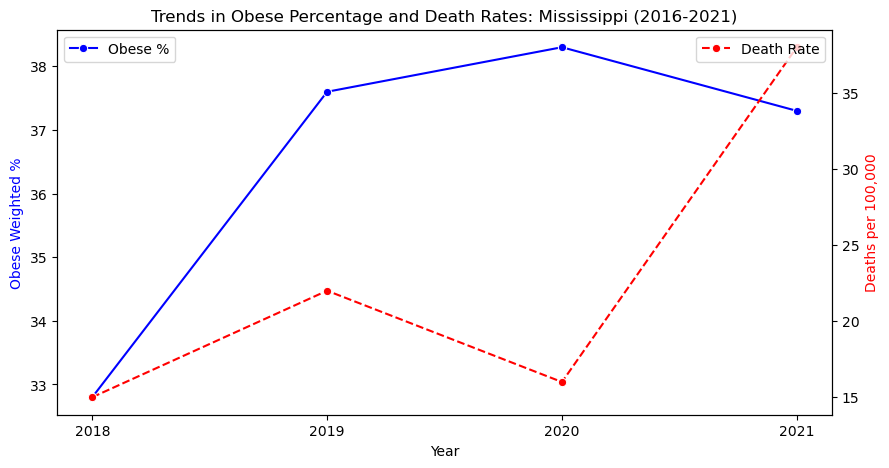

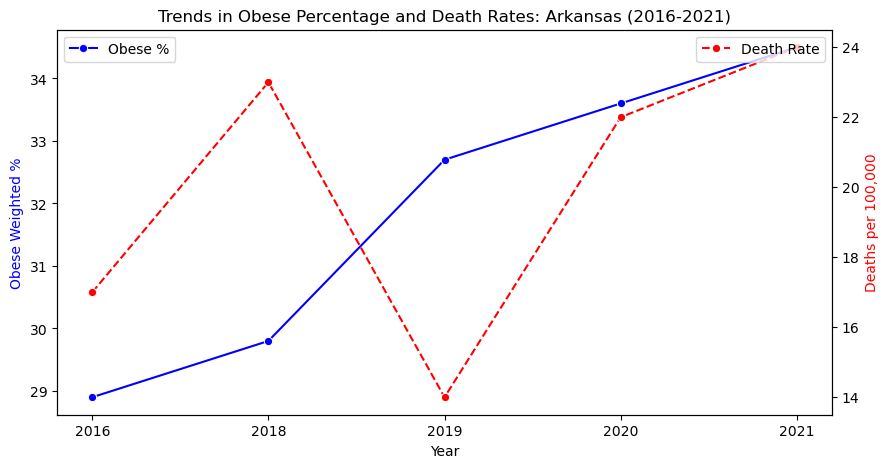

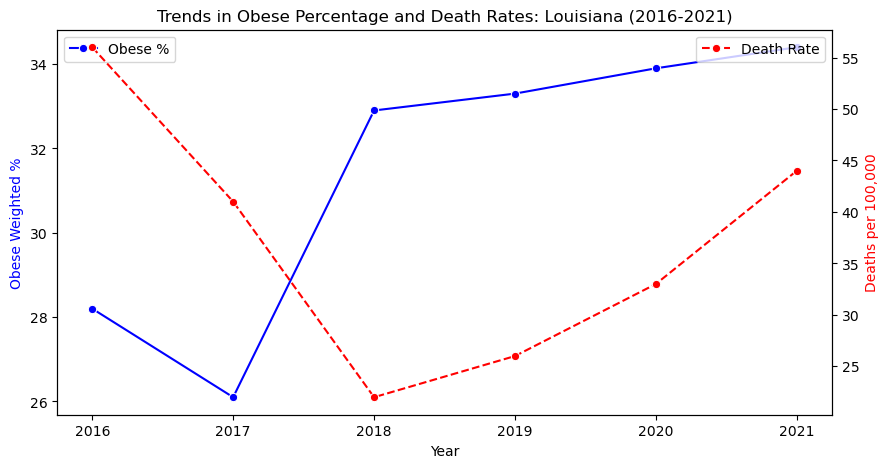

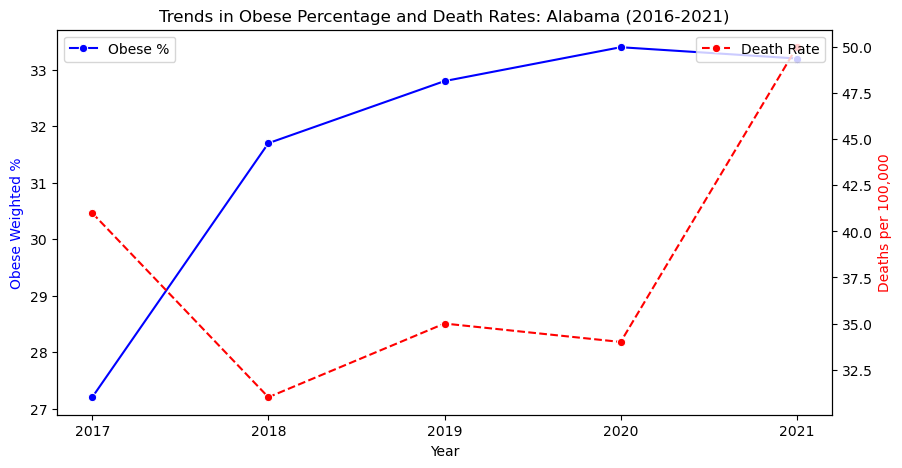

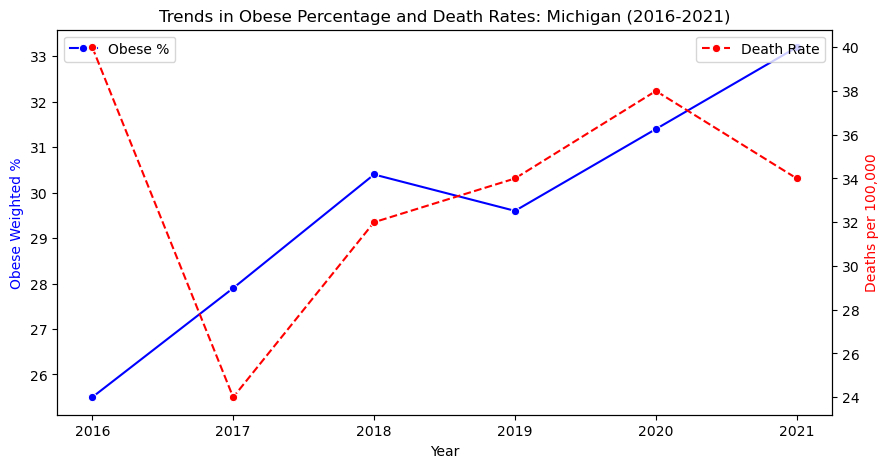

In [79]:
# Identify top 5 states in 2021 based on Overweight percentage
top_states_2021_overweight = data_filtered[data_filtered['Year'] == '2021'].nlargest(5, 'Obese Weighted %')['State']

# Creating individual plots for each of the top 5 states
for state in top_states_2021_overweight:
    state_data = data_filtered[data_filtered['State'] == state]

    plt.figure(figsize=(10, 5))
    ax1 = plt.gca()  # Primary axis for Underweight Weighted %
    ax2 = ax1.twinx()  # Secondary axis for Death Rates

    # Plotting Underweight Percentage
    sns.lineplot(x='Year', y='Obese Weighted %', data=state_data, ax=ax1, marker='o', color='blue', label='Obese %')

    # Plotting Death Rates
    sns.lineplot(x='Year', y='Deaths/100000', data=state_data, ax=ax2, marker='o', linestyle='--', color='red', label='Death Rate')

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Obese Weighted %', color='blue')
    ax2.set_ylabel('Deaths per 100,000', color='red')
    plt.title(f'Trends in Obese Percentage and Death Rates: {state} (2016-2021)')
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.show()

The trends between the overweight or underweight or obese percetage and death rates do not appear to be directly correlated. 